In [5]:
pip install Textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
col_names=['ID','Entity','Sentiment','Content']
df=pd.read_csv('twitter_training.csv',names=col_names)

In [12]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df.shape

(74682, 4)

In [17]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [19]:
df.duplicated().sum()

2700

In [22]:
df.dropna(axis=0,inplace=True)

In [24]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [26]:
df.duplicated().sum()

2340

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [30]:
sentiment_counts=df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

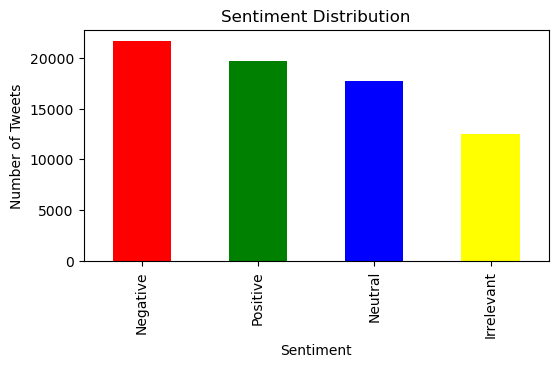

In [33]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

In [35]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

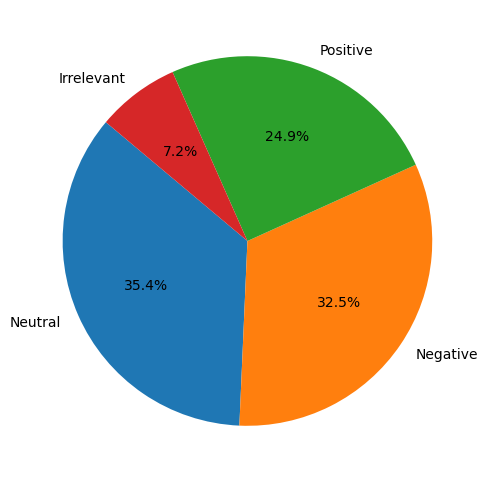

In [39]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.1f%%',startangle=140)
plt.show()
